<a href="https://colab.research.google.com/github/sandeeptuluri/Projects/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
single_image = x_train[0]

In [ ]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
single_image.shape

(28, 28)

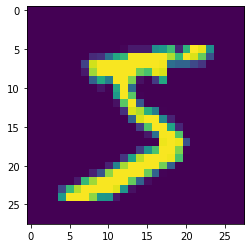

In [ ]:
plt.imshow(single_image)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_example = to_categorical(y_train)

In [ ]:
y_example.shape

(60000, 10)

In [ ]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [ ]:
y_cat_train = to_categorical(y_train,10)

In [ ]:
single_image.max()

255

In [ ]:
single_image.min()

0

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test/255

In [ ]:
scaled_image = x_train[0]

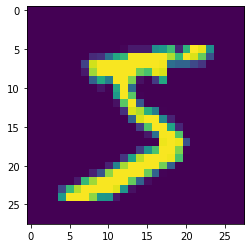

In [ ]:
plt.imshow(scaled_image)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# batch_size,width,height,color_channels
x_train = x_train.reshape(60000,28,28,1)

In [ ]:
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

#output layer softmax ---- multiclass
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience=1)

In [ ]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2863 - accuracy: 0.9134 - val_loss: 0.0555 - val_accuracy: 0.9817
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0497 - accuracy: 0.9850 - val_loss: 0.0384 - val_accuracy: 0.9871
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0296 - accuracy: 0.9912 - val_loss: 0.0389 - val_accuracy: 0.9868


In [ ]:
metrics = pd.DataFrame(model.history.history)

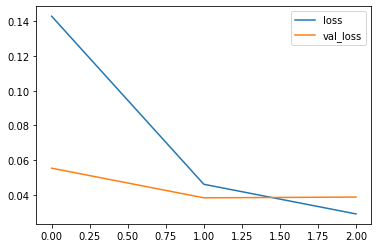

In [ ]:
metrics[['loss','val_loss']].plot()

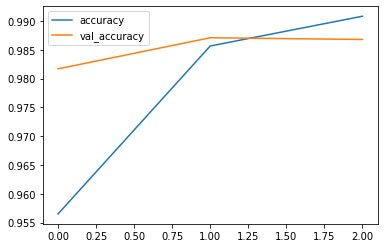

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.038862623274326324, 0.9868000149726868]

In [ ]:
predictions = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
y_test.shape

(10000,)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.97      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
print(confusion_matrix(y_test,predictions))

[[ 972    0    4    1    1    0    2    0    0    0]
 [   0 1128    2    2    0    0    1    1    1    0]
 [   0    0 1020    3    1    0    0    7    1    0]
 [   0    0    2 1007    0    0    0    0    1    0]
 [   0    0    0    0  973    0    2    0    0    7]
 [   1    0    1   12    0  869    3    0    2    4]
 [   5    2    1    1    1    2  943    0    3    0]
 [   0    1    5    4    1    0    0 1011    1    5]
 [   4    0    4    6    0    0    1    2  952    5]
 [   0    1    0    4    6    1    0    3    1  993]]


In [ ]:
import seaborn as sns

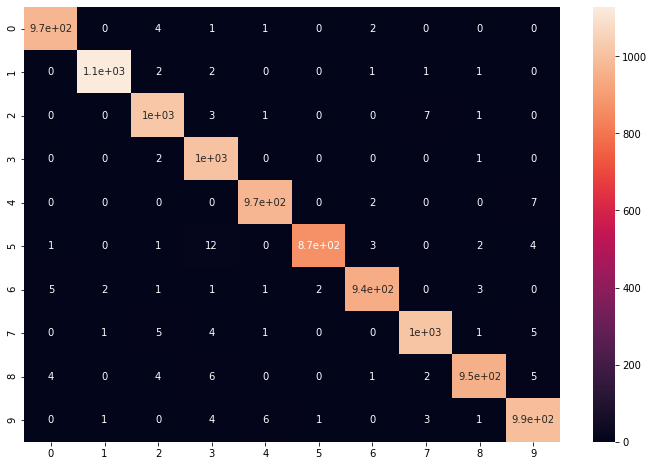

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [ ]:
my_num = x_test[500]

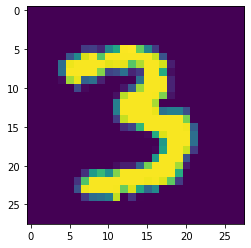

In [ ]:
plt.imshow(my_num.reshape(28,28))

In [ ]:
model.predict_classes(my_num.reshape(1,28,28,1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3])